In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
y = df['Outcome']
X = df.drop(columns ='Outcome')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=100)

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

#Instantiting the model
DTC = DecisionTreeClassifier(criterion='entropy',max_depth= 5, max_leaf_nodes= 18, min_samples_split= 6)

DTC.fit(X_train,y_train)

y_pred =DTC.predict(X_test)

outcome_df = pd.DataFrame({'Actuals':y_test,'Predicted': y_pred})

outcome_df

,Actuals,Predicted
173,0,0
253,0,0
207,1,0
737,0,0
191,0,1
754,1,1
159,1,1
448,1,0
359,1,1
651,0,0


# Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve,f1_score
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[81, 20],
       [26, 27]], dtype=int64)

In [18]:
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F-1Score:", f1_score(y_test,y_pred))

Accuracy: 0.7012987012987013
Precision: 0.574468085106383
Recall: 0.5094339622641509
F-1Score: 0.54


# ROC Curve

In [19]:
y_pred_proba = DTC.predict_proba(X_test)[:,1]
y_pred_proba

array([0.08943089, 0.08943089, 0.40384615, 0.18032787, 0.53846154,
       0.88888889, 0.88888889, 0.08943089, 0.92592593, 0.08943089,
       0.08943089, 0.92592593, 0.53571429, 0.08943089, 0.92592593,
       0.18032787, 0.        , 0.53846154, 0.77777778, 0.18032787,
       0.40384615, 0.        , 0.88888889, 0.92592593, 0.08943089,
       0.88888889, 0.6       , 0.33333333, 0.08943089, 0.40384615,
       0.08943089, 0.92592593, 0.08943089, 0.33333333, 0.53571429,
       0.        , 0.92592593, 0.        , 0.08943089, 0.08943089,
       0.18032787, 0.88888889, 0.53571429, 0.        , 0.53846154,
       0.92592593, 0.33333333, 0.18032787, 0.92592593, 0.92592593,
       0.18032787, 0.        , 0.40384615, 0.92592593, 0.88888889,
       0.88888889, 0.        , 0.18032787, 0.92592593, 0.08943089,
       0.08943089, 0.08943089, 0.6       , 0.6       , 0.        ,
       0.08943089, 0.08943089, 0.        , 0.08943089, 0.        ,
       0.        , 0.40384615, 0.        , 0.08943089, 0.18032

In [20]:
fpr,tpr,thresold = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)

print("FPR:",fpr)
print('\n')
print("TPR:",tpr)
print('\n')
print("Thresold:",thresold)
print('\n')
print("AUC:",auc)

FPR: [0.         0.00990099 0.03960396 0.06930693 0.06930693 0.13861386
 0.1980198  0.26732673 0.33663366 0.45544554 0.76237624 1.        ]


TPR: [0.         0.         0.22641509 0.37735849 0.39622642 0.43396226
 0.50943396 0.66037736 0.67924528 0.77358491 0.94339623 1.        ]


Thresold: [2.         1.         0.92592593 0.88888889 0.77777778 0.6
 0.53571429 0.40384615 0.33333333 0.18032787 0.08943089 0.        ]


AUC: 0.7367831122734916


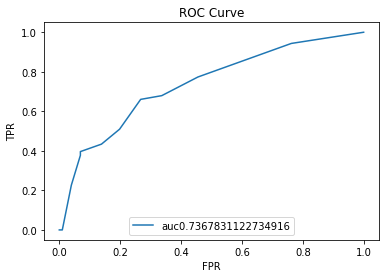

In [21]:
from matplotlib import pyplot as plt 

plt.plot(fpr,tpr,label="auc"+str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend(loc=8)
plt.show()

In [23]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [95]:
from sklearn.model_selection import GridSearchCV
import numpy as np
DTC2 = DecisionTreeClassifier(criterion='entropy')
parameter_grid = {'max_depth':np.arange(3,8),'min_samples_split':np.arange(5,20),'max_leaf_nodes':np.arange(10,20,2)}
GDTC = GridSearchCV(DTC2,param_grid=parameter_grid,cv=5)
GDTC.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7]),
                         'max_leaf_nodes': array([10, 12, 14, 16, 18]),

In [96]:
GDTC.best_params_

{'max_depth': 5, 'max_leaf_nodes': 18, 'min_samples_split': 5}

In [97]:
GDTC.best_score_

0.754071661237785

In [103]:
GDTC.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=18,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [99]:
y_pred = GDTC.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [100]:
outcome_df = pd.DataFrame({'Actuals':y_test,'Predicted': y_pred})

outcome_df

,Actuals,Predicted
173,0,0
253,0,0
207,1,0
737,0,0
191,0,1
754,1,1
159,1,1
448,1,0
359,1,1
651,0,0


In [101]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve,f1_score
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[81, 20],
       [26, 27]], dtype=int64)

In [102]:
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F-1Score:", f1_score(y_test,y_pred))

Accuracy: 0.7012987012987013
Precision: 0.574468085106383
Recall: 0.5094339622641509
F-1Score: 0.54
